# Classification avec deux distributions circulaires

In [186]:
## space for importing required libraries
from sklearn.datasets import make_classification, make_circles #libraries to generate data
import matplotlib.pyplot as plt # importing library to plot
import numpy as np #numpy library for data manipulation and plotting

# génération et affichage des 2 classes

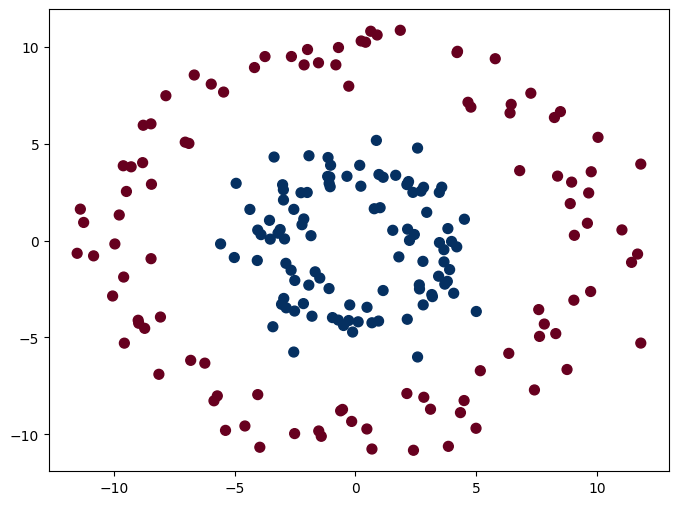

In [187]:
np.random.seed(4)
numPoints = 200
X, y = make_circles(n_samples=numPoints,
  factor=.4, noise=.1) #function to yield non circle data provided by sklearn
X = 10 * X

f, ax = plt.subplots(figsize=(8, 6)) #plotting data
ax.scatter(X[:,0],X[:,1], c=y, s=50,cmap="RdBu")
plt.show()


# Création du réseau de neurones.
### Trois couches 10 , 10 et 2 neurones
activation sigmoid, sigmoid et softmax pour la couche de sortie.

In [188]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras import initializers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
import numpy as np 

#my_init = initializers.Zeros() 
my_init = initializers.Ones()
#my_init = initializers.RandomUniform(minval=0.0, maxval=1.0)
#normalizer = preprocessing.Normalization()
model=Sequential()
#pour La couche d'entrée, input_shape vaut : 2  (car on a 2 features: x et y), pas de normalisation nécessaire
model.add(Dense(units=10,input_shape=[2],activation= 'sigmoid',kernel_initializer = my_init))
#Couches intermédiaires
model.add(Dense(units=10,activation= 'sigmoid'))
#La couche de sortie, units vaut 2 mais activation softmax
model.add(Dense(units=2, activation='softmax'))


#Optimiseur SGD ou adam ("adam "alternatif à "sgd")
#opt = SGD(learning_rate=0.01) #w = w - learning_rate * grad
opt = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error',optimizer=opt,  metrics=['accuracy'])
# entrée de dimension 2 (x, y)
entree = X
# y_true de dimension  2 (2 classes)
sortie = to_categorical(y) #Converts a class vector (integers) to binary class matrix.
# 0 >  0 1
# 1 >  1 0     vecteur (y_true) > matrice binaire (sortie)


#Entraînement du réseau 100 passages
history = model.fit(x=entree,y=sortie,epochs=100)
model.predict([[0, 5],[1,9]])

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.2600 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 0s/step - loss: 0.2545 - accuracy: 0.4950
Epoch 3/100
7/7 [==============================] - 0s 0s/step - loss: 0.2506 - accuracy: 0.5350
Epoch 4/100
7/7 [==============================] - 0s 0s/step - loss: 0.2509 - accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 0s/step - loss: 0.2501 - accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.5700
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2502 - accuracy: 0.5600
Epoch 8/100
7/7 [==============================] - 0s 0s/step - loss: 0.2492 - accuracy: 0.5650
Epoch 9/100
7/7 [==============================] - 0s 0s/step - loss: 0.2478 - accuracy: 0.5350
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.5500
Epoch 11/100
7/7 [=================

array([[0.08575574, 0.91424423],
       [0.9936659 , 0.00633405]], dtype=float32)

## Tracé des zones de prédiction

1954/1954 [==============================] - 2s 900us/step


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Domaines de décision ...'}>)

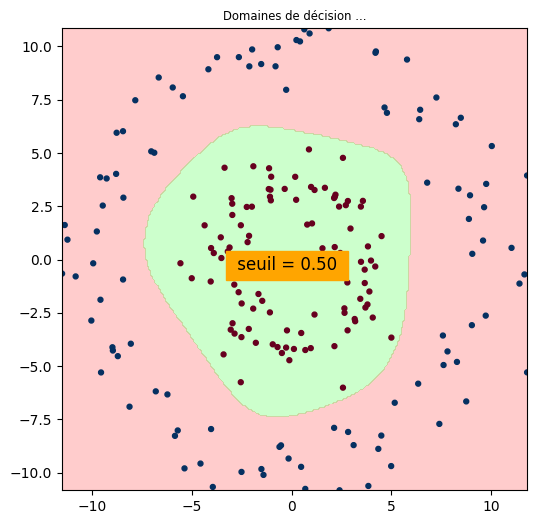

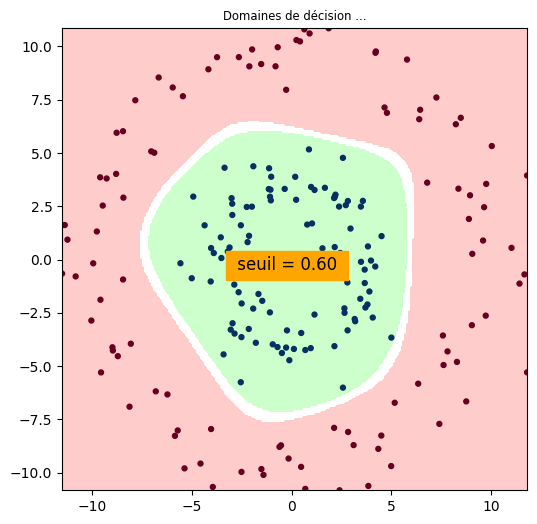

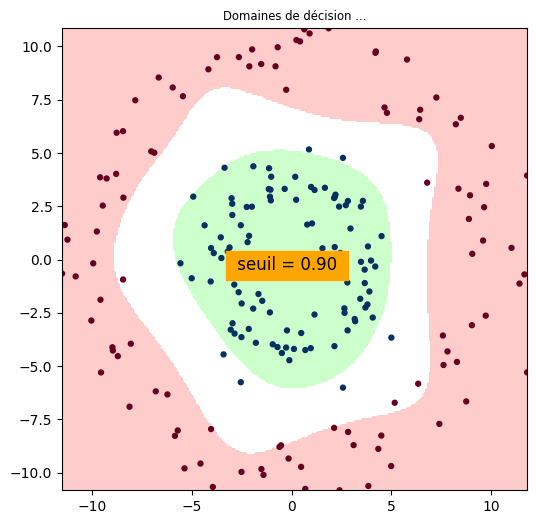

In [189]:
import matplotlib as mpl
def plot_decision_boundary2(X, y, NbClasses, model, steps=250,alpha=0.2,seuil=0.51):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    #alpha = alpha
    colorT = (0, 0, 0.0,0.0)# tranparent
    color2 = [(1, 0, 0,alpha),(0, 1, 0,alpha)]
    def C_map(coul):
        cmap = (mpl.colors.ListedColormap([colorT, coul]))
        return cmap

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min(), X[:,0].max()
    ymin, ymax = X[:,1].min(), X[:,1].max()
    steps = steps
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    fig = plt.figure(figsize=(6, 6))
    ax =plt.subplot(111)
    #fig, ax = plt.subplots()
    
    for i in range(0,NbClasses): 
        #labels1= labels[:,i]
        #print(labels1)
        # Plot decision boundary in region of interest
        z = labels[:,i].reshape(xx.shape)
        z = z > seuil #(seuil Threshold value)
        ax.contourf(xx, yy, z, cmap=C_map(color2[i]))
    plt.text(-3, -0.5, f" seuil = {seuil:.2f} ", fontsize = 12, backgroundcolor ='orange', ha ='left', c ='black')
    plt.title("Domaines de décision ...", fontsize="small")
    #print(y)
    ax.scatter(X[:,0], X[:,1], c= y,lw=1,marker=".", s=50,cmap="RdBu")
    
    return fig, ax

plot_decision_boundary2(entree, sortie[:,0], 2, model, alpha=0.2, seuil=0.5)
plot_decision_boundary2(entree, y, 2, model, alpha=0.2,seuil = 0.6)
plot_decision_boundary2(entree, y, 2, model, alpha=0.2,seuil = 0.9)

# Autre réseau avec des entrées élevées au carré
* La grandeur d'entrée est remplacée par X*X avec un seul neurone. 
 
Dans ce cas là la courbe de séparation des classes sera forcément une ellipse !



In [190]:
my_init = initializers.Zeros() 
#my_init = initializers.Ones()
#my_init = initializers.RandomUniform(minval=0.0, maxval=1.0)
#normalizer = preprocessing.Normalization()
model2=Sequential()
#pour La couche d'entrée, input_shape vaut : 2  (car on a 2 features: x et y), pas de normalisation nécessaire
model2.add(Dense(units=1,input_shape=[2],activation= 'sigmoid',kernel_initializer = my_init))
#La couche de sortie, units vaut 2 mais activation softmax
model2.add(Dense(units=2, activation='softmax'))


#Optimiseur SGD ou adam ("adam "alternatif à "sgd")
#opt = SGD(learning_rate=0.01) #w = w - learning_rate * grad
opt = Adam(learning_rate=0.01)
model2.compile(loss='mean_squared_error',optimizer=opt,  metrics=['accuracy'])
# entrée de dimension 2 (x, y)
entree2 = X*X
#print("X", X)
#print("entree2 ", entree2)
# sortie2 de dimension  2 (2 classes)
sortie2 = to_categorical(y) #Converts a class vector (integers) to binary class matrix.
# 0 >  0 1
# 1 >  1 0     vecteur (y_true) > matrice binaire (sortie)


#Entraînement du réseau 100 passages
#history2 = model2.fit(x=entree2,y=sortie2[:,0],epochs=100)
history2 = model2.fit(x=entree2,y=sortie2,epochs=100)
Test = np.array([[1,0],[1,6]])

resultat = model2.predict(Test)
print(resultat)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.2406 - accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2345 - accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2281 - accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2239 - accuracy: 0.5350
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.7350
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9100
Epoch 7/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.9550
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 0.2024 - accuracy: 0.9000
Epoch 9/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9300
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 0.1897 - accuracy: 0.9700
Epoch 11/100
7/7 [===========

   1/1954 [..............................] - ETA: 1:41

1954/1954 [==============================] - 2s 852us/step
labels  [[0.95108914 0.04891088]
 [0.95108914 0.04891088]
 [0.95108914 0.04891088]
 ...
 [0.95108914 0.04891088]
 [0.95108914 0.04891088]
 [0.95108914 0.04891088]]


(<Figure size 600x600 with 1 Axes>,
 <Axes: title={'center': 'Domaines de décision ...'}>)

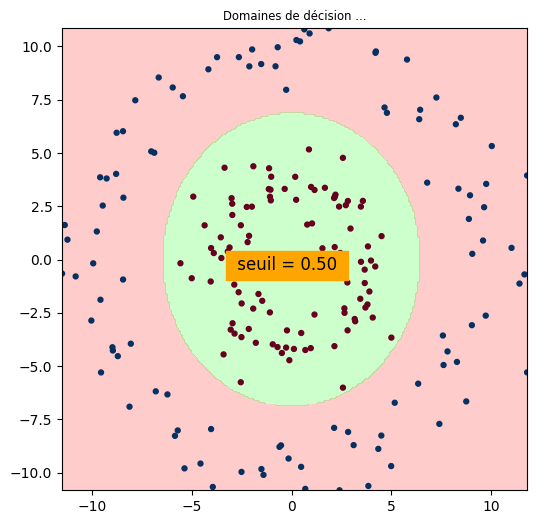

In [191]:
import matplotlib as mpl
def plot_decision_boundary3(X, y, NbClasses, model, steps=250,alpha=0.2,seuil=0.51):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    #alpha = alpha
    colorT = (0, 0, 0.0,0.0)# tranparent
    color2 = [(1, 0, 0,alpha),(0, 1, 0,alpha)]
    def C_map(coul):
        cmap = (mpl.colors.ListedColormap([colorT, coul]))
        return cmap

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min(), X[:,0].max()
    ymin, ymax = X[:,1].min(), X[:,1].max()
    steps = steps
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)
    #print(xx)
    #print("--")
    #print(xx.ravel())
    # Make predictions across region of interest
    X2 = xx.ravel()
    Y2 = yy.ravel()
    labels = model2.predict(np.c_[X2**2, Y2**2])# mise en forme : ravel() 
    print("labels ", labels)

    fig = plt.figure(figsize=(6, 6))
    ax =plt.subplot(111)
    #fig, ax = plt.subplots()
    for i in range(0,NbClasses): 
        #labels1= labels[:,i]
        #print(labels1)
        # Plot decision boundary in region of interest
        z = labels[:,i].reshape(xx.shape)
        z = z > seuil #(seuil Threshold value)
        ax.contourf(xx, yy, z, cmap=C_map(color2[i]))
    plt.text(-3, -0.5, f" seuil = {seuil:.2f} ", fontsize = 12, backgroundcolor ='orange', ha ='left', c ='black')
    plt.title("Domaines de décision ...", fontsize="small")
    #print(y)
    ax.scatter(X[:,0], X[:,1], c= y,lw=1,marker=".", s=50,cmap="RdBu")
    
    return fig, ax

plot_decision_boundary3(X, y=sortie2[:,0], NbClasses=2, model=model, steps=250, alpha=0.2, seuil=0.5)